In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# read csv file
df = pd.read_csv(r'C:\Users\Shakil\Downloads\Compressed\onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


# Preprocessing

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [74]:
# check null values
df.isnull().sum() 

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [75]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


# Visualization

Text(0.5, 1.0, 'Distribution of Age')

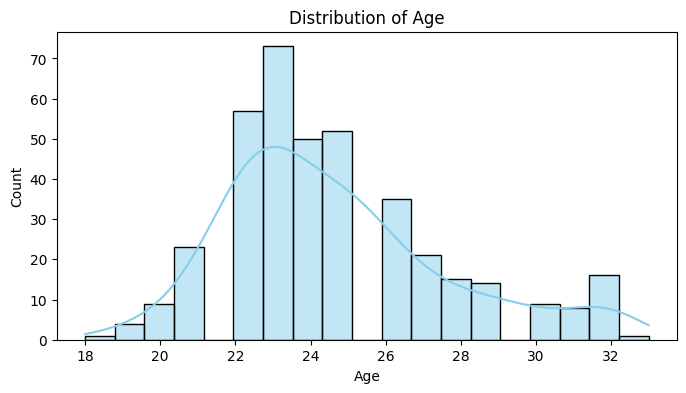

In [76]:
# Distribution of Age

plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')

* The age distribution is right-skewed, meaning most individuals are younger, with the peak around the 22-24 age range.
* There is a steep decline in the count after age 24
* The majority of the dataset consists of individuals between the ages of 20 and 26.
* After age 26 the number gradually decreases.

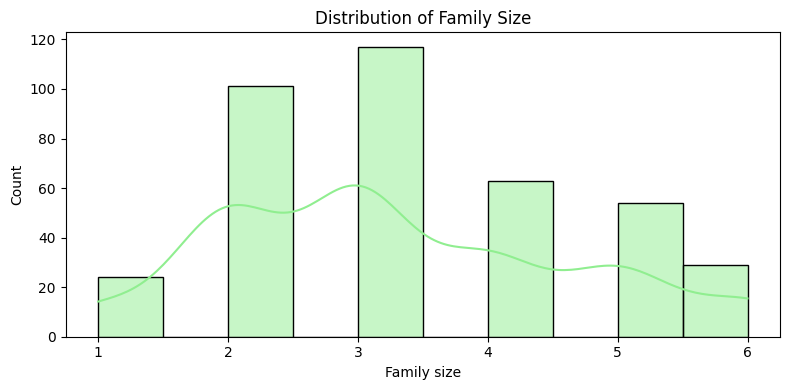

In [77]:
# Family size distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Family size'], kde=True, color='lightgreen')
plt.title('Distribution of Family Size')

plt.tight_layout()
plt.show()

* Family Size of 3: This chart ndicating that this family size is the most common in the dataset.
* Family Size of 2: Family size 2 follows closely, with a count around 100 individuals. 
* Family Size of 4: Families of size 4 have a moderate representation, with counts of about 60 individuals.
* The KDE line shows that when family size increases, indicating that smaller families are more dominant in this dataset.

Text(0.5, 1.0, 'Gender Distribution')

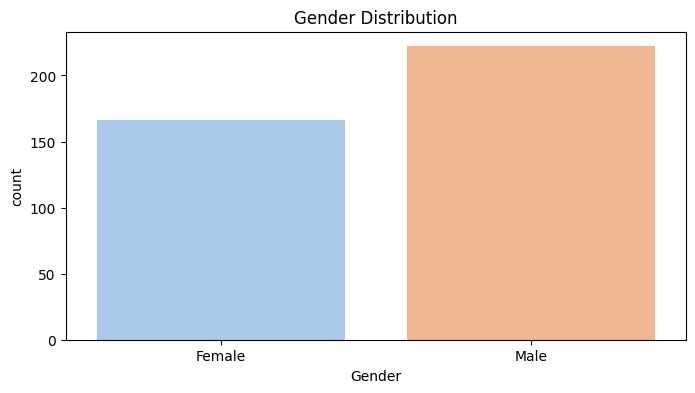

In [78]:
# Gender distribution
plt.figure(figsize=(8,4))
sns.countplot(x='Gender', data=df, hue='Gender', palette='pastel')
plt.title('Gender Distribution')

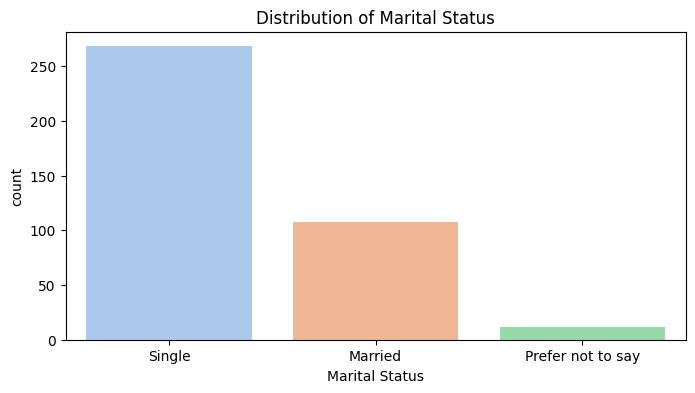

In [79]:
# distribution of Marital Status
plt.figure(figsize=(8, 4))

sns.countplot(x='Marital Status', data=df, hue='Marital Status', palette='pastel')
plt.title('Distribution of Marital Status')
plt.show()

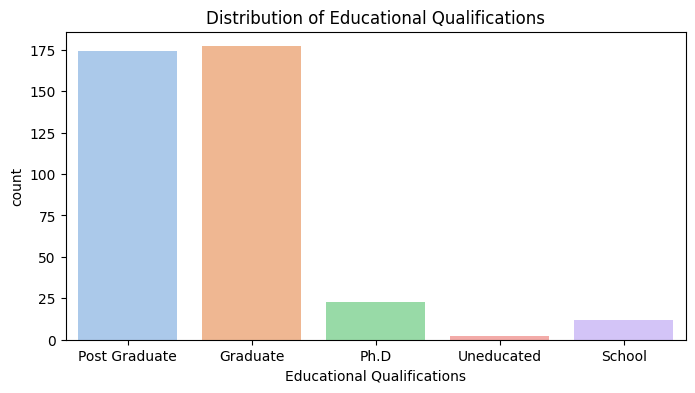

In [80]:
# Educational Qualifications distribution
plt.figure(figsize=(8, 4))

sns.countplot(x='Educational Qualifications', data=df, hue='Educational Qualifications', palette='pastel')
plt.title('Distribution of Educational Qualifications')
plt.show()

##### We can see 'Graduate' and 'Post Graduate' qualifications dominate the dataset, with both having the highest counts.

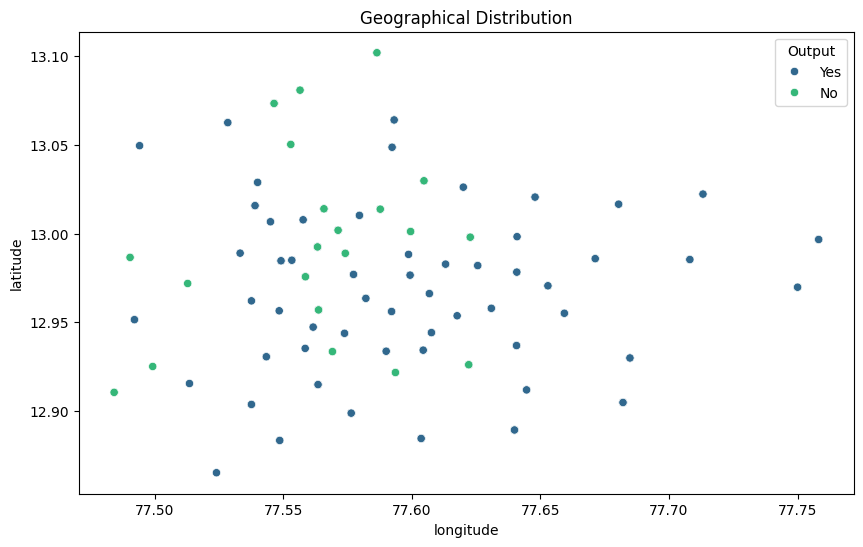

In [81]:
# Geographical distribution
plt.figure(figsize=(10, 6))

sns.scatterplot(x='longitude', y='latitude', data=df, hue='Output', palette='viridis')
plt.title('Geographical Distribution')
plt.show()

C:\Users\Shakil\AppData\Local\Temp\ipykernel_9796\323752531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Feedback', data=df, palette='viridis')


Text(0.5, 1.0, 'Feedback Distribution')

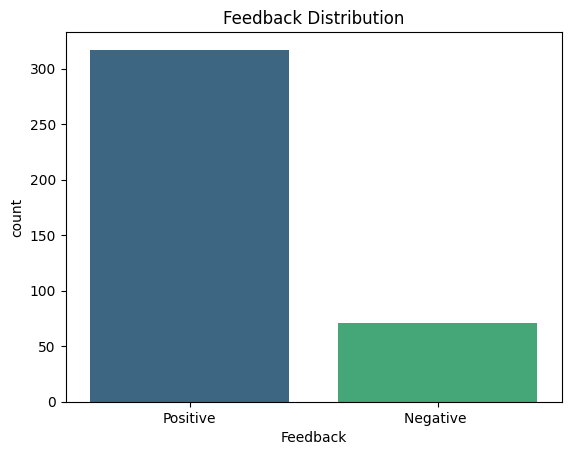

In [82]:
# feedback distribution
sns.countplot(x='Feedback', data=df, palette='viridis')
plt.title('Feedback Distribution')

##### After visualizing we can see that our number of positive feedbacks is very high.

# Feature Encoding

In [83]:
def map_income(income):
    if income == 'Below Rs.10000':
        return 10000
    elif income == '10001 to 25000':
        return 25000
    elif income == '25001 to 50000':
        return 50000
    elif income == 'More than 50000':
        return 80000
    else: 
        return 0

df['Monthly Income'] = df['Monthly Income'].apply(map_income)

In [84]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Transform categorical column into numerical values
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
#df['Monthly Income'] = le.fit_transform(df['Monthly Income'])
df['Educational Qualifications'] = le.fit_transform(df['Educational Qualifications'])
df['Output'] = le.fit_transform(df['Output'])
df['Feedback'] = le.fit_transform(df['Feedback'])
df['Unnamed: 12'] = le.fit_transform(df['Unnamed: 12'])

# Model Training

In [90]:
# import packages
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
x = df.drop(['Output', 'Unnamed: 12'], axis=1) # train
y = df['Output'] # test

# train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)

In [92]:
models = {'Random Forest': RandomForestClassifier(random_state=42),
          'Decision Tree': DecisionTreeClassifier()}

for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(f'Model: {name}')
    print('Report:\n', classification_report(ytest, ypred))

Model: Random Forest
Report:
               precision    recall  f1-score   support

           0       0.85      0.61      0.71        18
           1       0.89      0.97      0.93        60

    accuracy                           0.88        78
   macro avg       0.87      0.79      0.82        78
weighted avg       0.88      0.88      0.88        78

Model: Decision Tree
Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.93      0.92      0.92        60

    accuracy                           0.88        78
   macro avg       0.83      0.85      0.84        78
weighted avg       0.89      0.88      0.89        78



In [93]:
# confusion matrix for decision trees
print(confusion_matrix(ytest, ypred)) 

# classification report for decision trees
print(classification_report(ytest, ypred))

[[14  4]
 [ 5 55]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.93      0.92      0.92        60

    accuracy                           0.88        78
   macro avg       0.83      0.85      0.84        78
weighted avg       0.89      0.88      0.89        78

